Import all libraries useful

In [1]:
import numpy as np # forlinear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image
print(os.listdir("./"))

# Keras Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

['.ipynb_checkpoints', 'chest_Xray', 'chest_Xray.zip', 'Para_Cell', 'Pneumonia.ipynb', 'xray_model.h5']


In [2]:
import zipfile
with zipfile.ZipFile("./chest_Xray.zip","r") as zip_ref:
    zip_ref.extractall('')

In [3]:
mainDIR = os.listdir('./chest_xray')
print(mainDIR)

['.DS_Store', 'test', 'train', 'val']


Define train, val and test folder images

In [4]:
train_folder = './chest_xray/train/'
val_folder = './chest_xray/val/'
test_folder = './chest_xray/test'

In [5]:
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

Create Sequential model

In [6]:
cnn = Sequential()

Add 2D Convolution, 2D Max Pooling, Flatten, Dense and compile it

In [7]:
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(224, 224, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(128, (3, 3), activation="relu", input_shape=(224, 224, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(256, (3, 3), activation="relu", input_shape=(224, 224, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

cnn.add(Dropout(0.5))


# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 512))
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
batch_size = 16

Generate new images to have better train data with ImageDataGenerator.
Define Training set and Test set.

In [9]:
# Fitting the CNN to the images

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory('./chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory('./chest_xray/val/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary')

test_set = test_datagen.flow_from_directory('./chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 256)       2

Add EarlyStopping to avoid Overfitting

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint('xray_model.h5', save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss',patience=10)

Fit Model

In [12]:
cnn_model = cnn.fit(training_set,
                         epochs = 100,
                         validation_data = validation_generator,
                         callbacks=[early_stop, checkpoint])

Epoch 1/100
326/326 [==============================] - 157s 455ms/step - loss: 0.4606 - accuracy: 0.7655 - val_loss: 0.7475 - val_accuracy: 0.5000
Epoch 2/100
326/326 [==============================] - 160s 490ms/step - loss: 0.3712 - accuracy: 0.8271 - val_loss: 0.5527 - val_accuracy: 0.6875
Epoch 3/100
326/326 [==============================] - 132s 405ms/step - loss: 0.3473 - accuracy: 0.8428 - val_loss: 0.6950 - val_accuracy: 0.6250
Epoch 4/100
326/326 [==============================] - 118s 362ms/step - loss: 0.3098 - accuracy: 0.8629 - val_loss: 0.8587 - val_accuracy: 0.5625
Epoch 5/100
326/326 [==============================] - 132s 406ms/step - loss: 0.2811 - accuracy: 0.8792 - val_loss: 0.5127 - val_accuracy: 0.6875
Epoch 6/100
326/326 [==============================] - 147s 452ms/step - loss: 0.2576 - accuracy: 0.8900 - val_loss: 0.6525 - val_accuracy: 0.6875
Epoch 7/100
326/326 [==============================] - 127s 389ms/step - loss: 0.2345 - accuracy: 0.9041 - val_loss: 0

In [13]:
metrics = pd.DataFrame(cnn_model.history)

<AxesSubplot:>

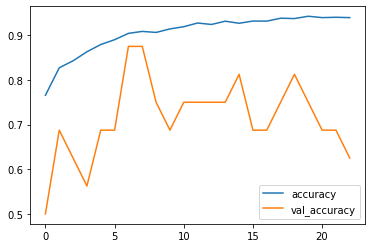

In [14]:
metrics[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

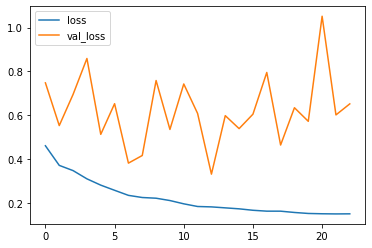

In [15]:
metrics[['loss', 'val_loss']].plot()

Evaluate our model with test set

In [16]:
test_accu = cnn.evaluate(test_set)

39/39 [==============================] - 9s 219ms/step - loss: 0.3629 - accuracy: 0.8654


Check the test accuracy %

In [17]:
print('The test accuracy is :', test_accu[1]*100, '%')

The test accuracy is : 86.53846383094788 %


In [18]:
cnn.metrics_names

['loss', 'accuracy']

In [19]:
from tensorflow.keras.preprocessing import image

In [20]:
pred_probabilities = cnn.predict(test_set)

In [21]:
predictions = pred_probabilities > 0.8

In [22]:
print(classification_report(test_set.classes,predictions))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       234
           1       0.91      0.86      0.88       390

    accuracy                           0.86       624
   macro avg       0.85      0.86      0.85       624
weighted avg       0.86      0.86      0.86       624



In [23]:
confusion_matrix(test_set.classes, predictions)

array([[200,  34],
       [ 54, 336]], dtype=int64)

Heatmap of confusion_matrix predictions to check precision of our model

<AxesSubplot:>

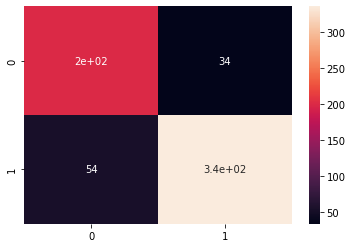

In [24]:
sns.heatmap(confusion_matrix(test_set.classes,predictions),annot=True)